In [1]:
import pandas as pd
import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
r = requests.get(data_url,allow_redirects = True)
open('AirQualityUCI.zip', 'wb').write(r.content)

1543989

In [3]:
data_zip = ZipFile('AirQualityUCI.zip')
data_zip.extractall()

In [4]:
data = pd.read_csv('AirQualityUCI.csv', sep = ';', decimal=',')

In [5]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_drop = data.copy()

In [7]:
data_drop.dropna(how= 'all', inplace = True)
    

In [8]:
df_date_RH = data_drop[['Date','RH']].copy()

In [9]:
data_RH = df_date_RH.groupby(['Date']).mean().reset_index()

In [10]:
data_RH

,Date,RH
0,01/01/2005,50.795833
1,01/02/2005,51.741667
2,01/03/2005,35.104167
3,01/04/2004,19.741667
4,01/04/2005,35.962500
...,...,...
386,31/05/2004,42.870833
387,31/07/2004,28.212500
388,31/08/2004,46.183333
389,31/10/2004,68.829167


In [11]:
data_RH.columns

Index(['Date', 'RH'], dtype='object')

In [12]:
data_RH['Date'] = pd.to_datetime(data_RH.Date)

In [13]:
data_sorted = data_RH.sort_values(by='Date').copy()

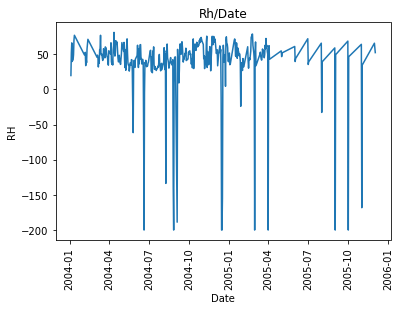

In [29]:
plt.plot(data_sorted['Date'],data_sorted['RH'])
plt.xlabel('Date',)
plt.xticks(rotation = 90)
plt.ylabel('RH')
plt.title('Rh/Date')
plt.show()

In [15]:
data_replaceNA = data.copy()

In [16]:
data_replaceNA['RH'].fillna(data_replaceNA['RH'].median(), inplace=True)

In [17]:
data_replaceNA.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                  0
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [18]:
lower_bound = 0.05
upper_boud = 0.95
lower_value, upper_value = data_replaceNA['RH'].quantile([lower_bound, upper_boud])

In [19]:
lower_value

15.1

In [20]:
upper_value

77.5

In [21]:
data_replaceNA['Outlier'] = [False if i>lower_value and i<upper_value else True for i in data_replaceNA.RH]

In [22]:
data_replaceNA['Outlier'].value_counts()

False    8520
True      951
Name: Outlier, dtype: int64

In [23]:
data_frame_outlier = data_replaceNA.loc[data_replaceNA['Outlier']==True]

In [24]:
data_frame_outlier.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Outlier
20,11/03/2004,14.00.00,2.9,1371.0,164.0,11.5,1034.0,207.0,983.0,128.0,1730.0,1037.0,8.0,81.1,0.8736,NaN,NaN,True
21,11/03/2004,15.00.00,2.2,1310.0,79.0,8.8,933.0,184.0,1082.0,126.0,1647.0,946.0,8.3,79.8,0.8778,NaN,NaN,True
167,17/03/2004,17.00.00,2.5,1247.0,134.0,12.3,1060.0,147.0,1032.0,114.0,1525.0,1069.0,28.5,14.9,0.5708,NaN,NaN,True
299,23/03/2004,05.00.00,0.3,834.0,19.0,0.6,459.0,13.0,1908.0,22.0,1212.0,361.0,8.8,80.5,0.9147,NaN,NaN,True
334,24/03/2004,16.00.00,2.7,1390.0,230.0,11.4,1028.0,197.0,829.0,126.0,1730.0,1002.0,9.6,81.1,0.9720,NaN,NaN,True


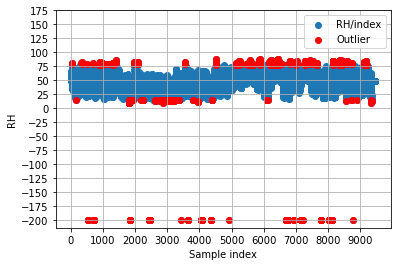

In [30]:
plt.scatter(data_replaceNA.index, data_replaceNA['RH'], label = 'RH/index')
plt.scatter(data_frame_outlier.index,data_frame_outlier['RH'],color = 'red',label ='Outlier')
plt.xticks(np.arange(min(data_replaceNA.index), max(data_replaceNA.index), 1000.0))
plt.yticks(np.arange(min(data_replaceNA['RH']), 200, 25.0))
plt.xlabel('Sample index',)
plt.ylabel('RH')
plt.grid()
plt.legend()
plt.show
plt.savefig('RH/index.png',dpi=500)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T', ylabel='Density'>

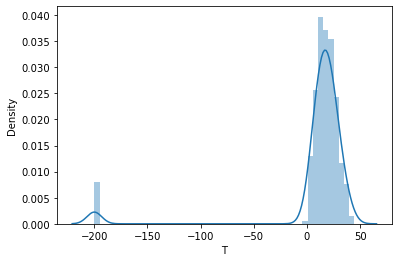

In [26]:
sns.distplot(data_drop['T'], hist= True)

In [27]:
data_drop['T'].median()

17.2

([<matplotlib.axis.YTick at 0x7f972b7d9ad0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

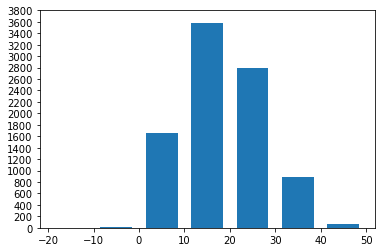

In [31]:
plt.hist(data_drop['T'], rwidth=0.7,bins = [-20,-10,0,10,20,30,40,50])
plt.yticks(np.arange(0,4000,200.0))

In [ ]:
#Najcześciej występująca wartość temperatury to 17.2. Główny przedział temperatur mieści się w granicach 10:20 stopni. 

In [32]:
df_RH_T = data_drop[['T','RH']].copy()

In [33]:
df_RH_T.sort_values(by='T')

,T,RH
4088,-200.0,-200.0
1826,-200.0,-200.0
1827,-200.0,-200.0
7196,-200.0,-200.0
7197,-200.0,-200.0
...,...,...
3212,42.8,14.3
3237,43.1,13.8
3215,43.4,14.8
3213,44.3,13.0


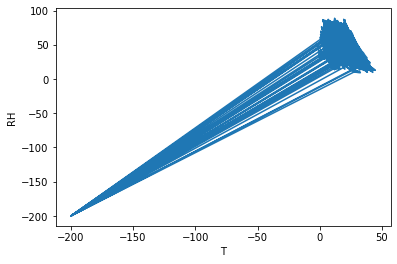

In [34]:
plt.plot(df_RH_T['T'],df_RH_T['RH'])
plt.xlabel('T')
plt.ylabel('RH')
plt.show()

In [35]:
df_RH_T.corr()

,T,RH
T,1.000000,0.885911
RH,0.885911,1.000000


array([[<AxesSubplot:xlabel='T', ylabel='T'>,
        <AxesSubplot:xlabel='RH', ylabel='T'>],
       [<AxesSubplot:xlabel='T', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>]], dtype=object)

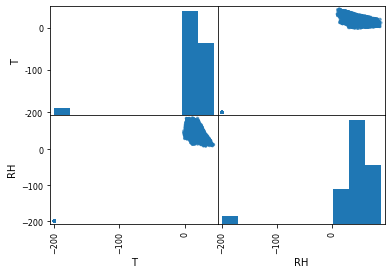

In [36]:
pd.plotting.scatter_matrix(df_RH_T)

In [ ]:
#Pomiedzy T a RH występuje bardzo silna korelacja. Im większa temperatura tym większa wilgotność powietrza. W tym wypadku również wypada zwrócić uwagę na wartości odstające, gdyż kilka wierszy otrzymało wartości -200 co może świadczyć o błędzie pomiarowym. 